In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

## Intro
Modified names, misterious transformed in legendaries, assigned new attribute "Form"

In [24]:
pkm_dataset_url = "data/Pokemon.csv"
pkm_matchup_url = "data/PokeTypeMatchupData.csv"

In [25]:
#pkm_df = pd.read_csv(pkm_dataset_url)
pkm_df = pd.read_csv("data/Pokemon.csv")
pkm_df.head()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [26]:
#pkm_mu_df = pd.read_csv(pkm_matchup_url)
pkm_mu_df = pd.read_csv("data/PokeTypeMatchupData.csv")
pkm_mu_df.head()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,#001,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
1,Ivysaur,#002,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
2,Venusaur,#003,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
3,Charmander,#004,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5
4,Charmeleon,#005,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5


In [27]:
pkm_mu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      576 non-null    object
 1   Number    576 non-null    object
 2   Normal    576 non-null    object
 3   Fire      576 non-null    object
 4   Water     576 non-null    object
 5   Electric  576 non-null    object
 6   Grass     576 non-null    object
 7   Ice       576 non-null    object
 8   Fighting  576 non-null    object
 9   Poison    576 non-null    object
 10  Ground    576 non-null    object
 11  Flying    576 non-null    object
 12  Psychic   576 non-null    object
 13  Bug       576 non-null    object
 14  Rock      576 non-null    object
 15  Ghost     576 non-null    object
 16  Dragon    576 non-null    object
 17  Dark      576 non-null    object
 18  Steel     576 non-null    object
 19  Fairy     576 non-null    object
dtypes: object(20)
memory usage: 90.1+ KB


# Preprocessing

In [28]:
typesN = ["Type 1", "Type 2"]
stats = ["HP", "Attack", "Defense", "Sp Atk", "Sp Def", "Speed"]
stats_tot = ["HP", "Attack", "Defense", "Sp Atk", "Sp Def", "Speed", "Total"]

In [29]:
# Pokemon matchup dataset
#Remove asterisks before the multiplier and setup data types
pkm_mu_df.replace(to_replace = "[#, *]", value = "", regex = True, inplace = True)
pkm_mu_df["Number"] = pkm_mu_df["Number"].astype(int)

types = ["Normal", "Fire", "Water", "Electric", "Grass", "Ice", "Fighting", "Poison", "Ground", "Flying",
        "Psychic", "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy"]
pkm_mu_df[types]=pkm_mu_df[types].astype(float)

pkm_mu_df.head()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,5,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [30]:
pkm_df["Type 2"].fillna(value='None', inplace=True)
pkm_df.head()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


In [31]:
#some pokemon have multiple forms
pkm_df.tail()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
742,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,6,True
743,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
744,720,Hoopa-Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
745,720,Hoopa-Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
746,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [32]:
pkm_df[["Name", "Form"]] = pkm_df["Name"].str.split("-", expand=True)

In [33]:
pkm_df = pkm_df[["N", "Name", "Form", "Generation"] + typesN + stats_tot + ["Legendary"]]
pkm_df.head(10)

,N,Name,Form,Generation,Type 1,Type 2,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,Legendary
0,1,Bulbasaur,None,1,Grass,Poison,45,49,49,65,65,45,318,False
1,2,Ivysaur,None,1,Grass,Poison,60,62,63,80,80,60,405,False
2,3,Venusaur,None,1,Grass,Poison,80,82,83,100,100,80,525,False
3,4,Charmander,None,1,Fire,None,39,52,43,60,50,65,309,False
4,5,Charmeleon,None,1,Fire,None,58,64,58,80,65,80,405,False
5,6,Charizard,None,1,Fire,Flying,78,84,78,109,85,100,534,False
6,7,Squirtle,None,1,Water,None,44,48,65,50,64,43,314,False
7,8,Wartortle,None,1,Water,None,59,63,80,65,80,58,405,False
8,9,Blastoise,None,1,Water,None,79,83,100,85,105,78,530,False
9,10,Caterpie,None,1,Bug,None,45,30,35,20,20,45,195,False


In [34]:
pkm_df.tail()

,N,Name,Form,Generation,Type 1,Type 2,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,Legendary
742,718,Zygarde,None,6,Dragon,Ground,108,100,121,81,95,95,600,True
743,719,Diancie,None,6,Rock,Fairy,50,100,150,100,150,50,600,True
744,720,Hoopa,Confined,6,Psychic,Ghost,80,110,60,150,130,70,600,True
745,720,Hoopa,Unbound,6,Psychic,Dark,80,160,60,170,130,80,680,True
746,721,Volcanion,None,6,Fire,Water,80,110,120,130,90,70,600,True


# Exploration

## Pokemon distribution per gen and legendary

In [35]:
pkm_rarity_df = pkm_df.rename(columns={"Legendary":"Rarity"}).replace({"Rarity": {False: "Common", True: "Legendary"}})
pkm_rarity_df = pkm_rarity_df[["N", "Name", "Generation", "Rarity"]].drop_duplicates()
pkm_rarity_df.head()

,N,Name,Generation,Rarity
0,1,Bulbasaur,1,Common
1,2,Ivysaur,1,Common
2,3,Venusaur,1,Common
3,4,Charmander,1,Common
4,5,Charmeleon,1,Common


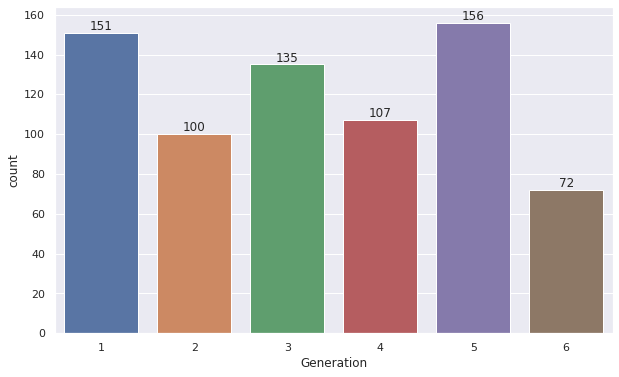

In [89]:
#Pokemon in each generation
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Generation", data=pkm_rarity_df)
ax.bar_label(ax.containers[0])
plt.show()

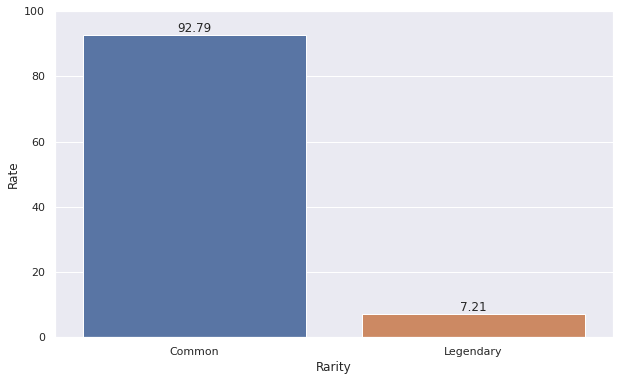

In [37]:
#Legendary Rate
pkm_rarity_distr_df = pkm_rarity_df[["Rarity"]].value_counts(normalize=True).reset_index(name="Rate")
pkm_rarity_distr_df["Rate"] = pkm_rarity_distr_df["Rate"]*100
plt.figure(figsize=(10,6))
ax = sns.barplot(y="Rate", x="Rarity", data=pkm_rarity_distr_df)
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.ylim((0,100))
#print(ax.containers[0])
plt.show()

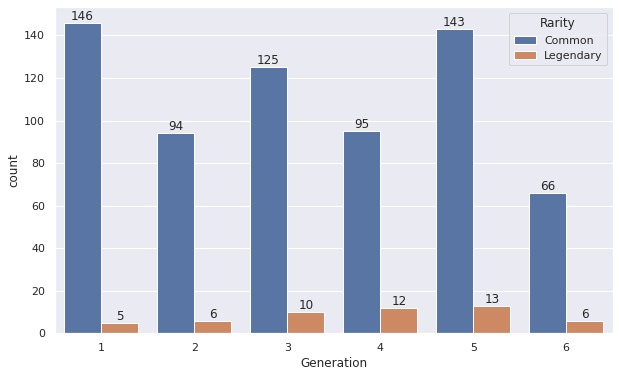

In [38]:
#Pokemon common and legendary in each generation
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Generation", hue="Rarity", data=pkm_rarity_df)
for container in ax.containers:
    ax.bar_label(container)

plt.show()


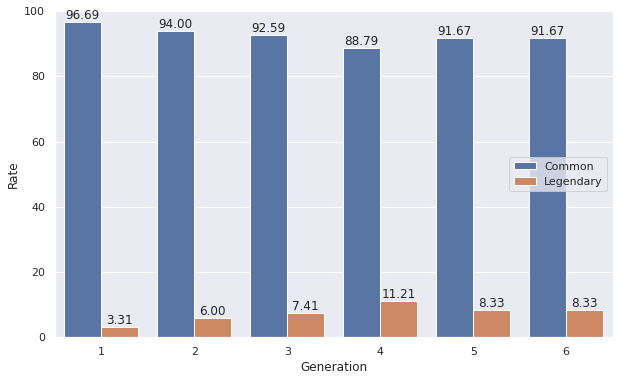

In [39]:
pkm_rarity_gen_df = pkm_rarity_df.groupby(["Generation","Rarity"]).size().reset_index(name="Rate")
s = pkm_rarity_df["Generation"].value_counts()
pkm_rarity_gen_df["Rate"] = pkm_rarity_gen_df["Rate"].div(pkm_rarity_gen_df['Generation'].map(s))*100

plt.figure(figsize=(10,6))
ax = sns.barplot(y="Rate", x="Generation", hue="Rarity", data=pkm_rarity_gen_df)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.legend(loc="right")
plt.ylim((0,100))
plt.show()

## Types distribution

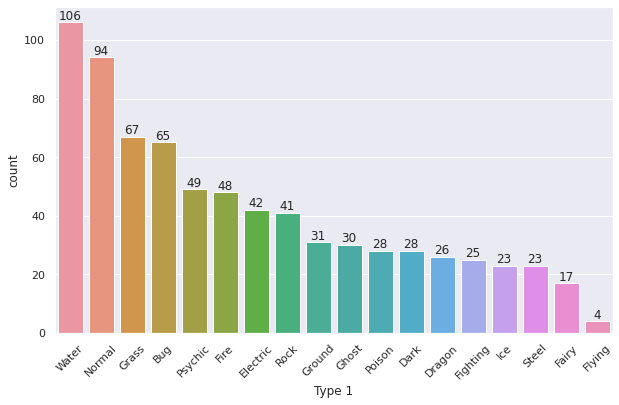

In [40]:
#Pokemon per Type 1
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Type 1", data=pkm_df, order=pkm_df["Type 1"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

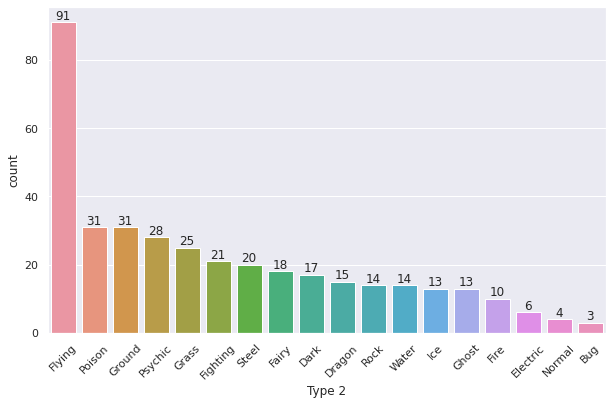

In [41]:
#Pokemon per Type 2
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Type 2", data=pkm_df[-(pkm_df["Type 2"] == "None")],
                   order=pkm_df[-(pkm_df["Type 2"] == "None")]["Type 2"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

## Type with most pokemons per generation 

In [42]:
pkm_gen_type1_df = pkm_df[["Name","Generation","Type 1"]].drop_duplicates().groupby(["Generation","Type 1"]).size().reset_index(name="Quantity")
idx = pkm_gen_type1_df.groupby(["Generation"])["Quantity"].transform(max) == pkm_gen_type1_df["Quantity"]
pkm_gen_type1_df[idx].reset_index(drop=True)

,Generation,Type 1,Quantity
0,1,Water,28
1,2,Water,18
2,3,Water,24
3,4,Normal,17
4,5,Bug,18
5,6,Fairy,9


In [43]:
pkm_gen_type2_df = pkm_df[-(pkm_df["Type 2"] == "None")][["Name","Generation","Type 2"]].drop_duplicates().groupby(["Generation","Type 2"]).size().reset_index(name="Quantity")
idx = pkm_gen_type2_df.groupby(["Generation"])["Quantity"].transform(max) == pkm_gen_type2_df["Quantity"]
pkm_gen_type2_df[idx].reset_index(drop=True)

,Generation,Type 2,Quantity
0,1,Flying,19
1,1,Poison,19
2,2,Flying,19
3,3,Flying,12
4,3,Psychic,12
5,4,Flying,16
6,5,Flying,17
7,6,Flying,6


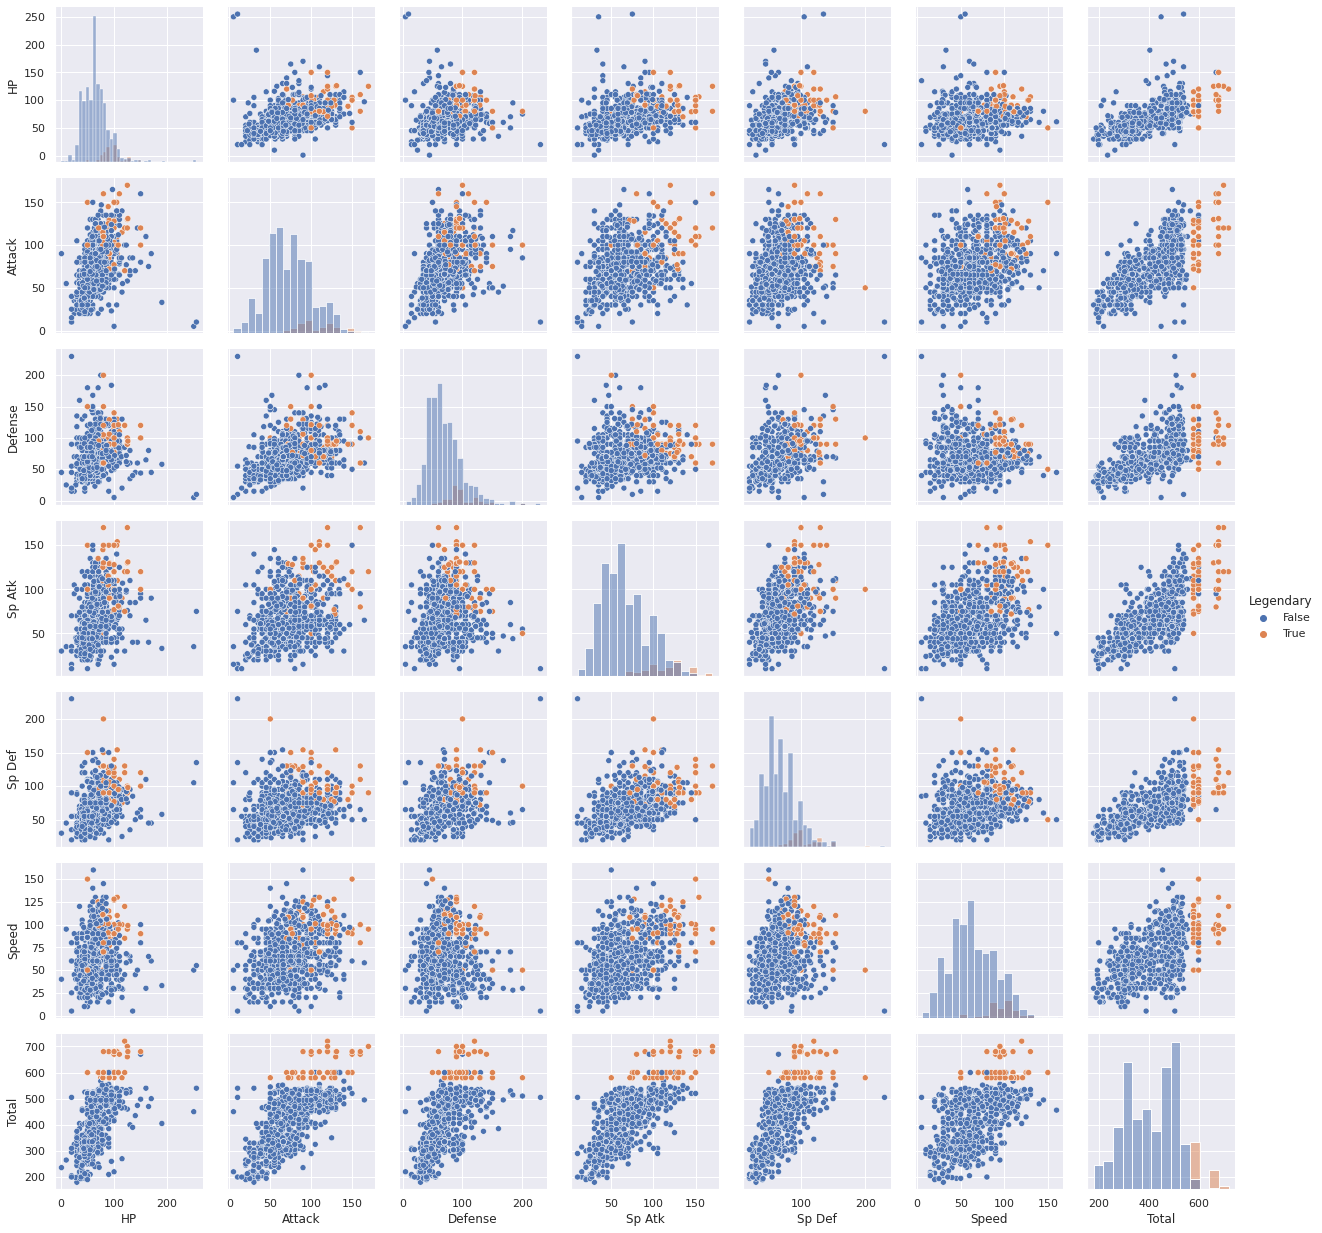

In [87]:
g = sns.PairGrid(pkm_df[stats_tot + ["Legendary"]], hue="Legendary")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

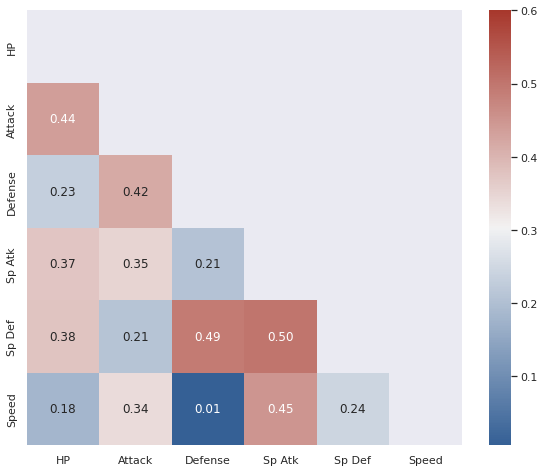

In [88]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = pkm_df[stats].corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax, vmax=0.6)
#plt.title("Correlation matrix - global means")
#plt.tight_layout()
plt.show()

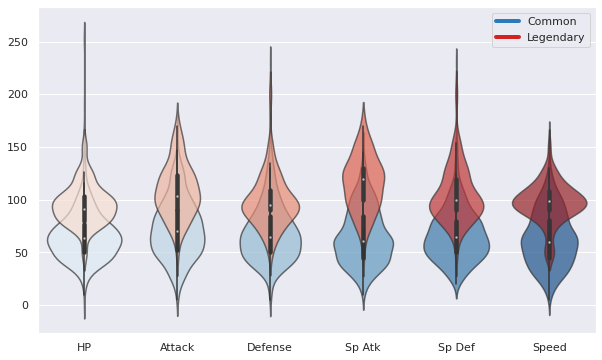

In [84]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=sns.color_palette("Blues")[4], lw=4),
                Line2D([0], [0], color=sns.color_palette("Reds")[4], lw=4)]

plt.figure(figsize=(10,6))
sns.violinplot(data=pkm_df[pkm_df["Legendary"]==False][stats], palette="Blues")
ax2 = sns.violinplot(data=pkm_df[pkm_df["Legendary"]==True][stats], palette="Reds")
plt.setp(ax2.collections, alpha=.7)
ax2.legend(custom_lines, ["Common", "Legendary"])
plt.show()

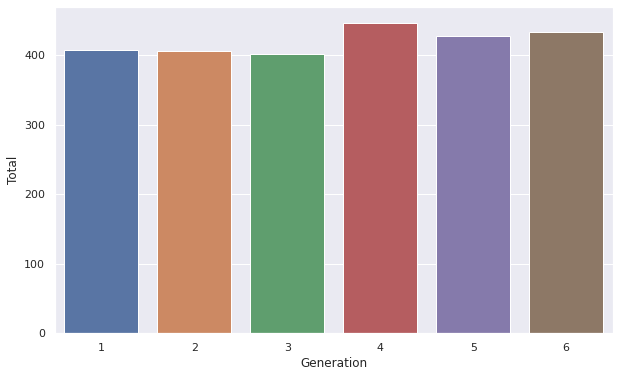

In [110]:
pkm_tot_gen_df = pkm_df[["Name","Generation", "Total"]].drop_duplicates().groupby(["Generation"]).mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Generation", y="Total", data=pkm_tot_gen_df)
plt.show()

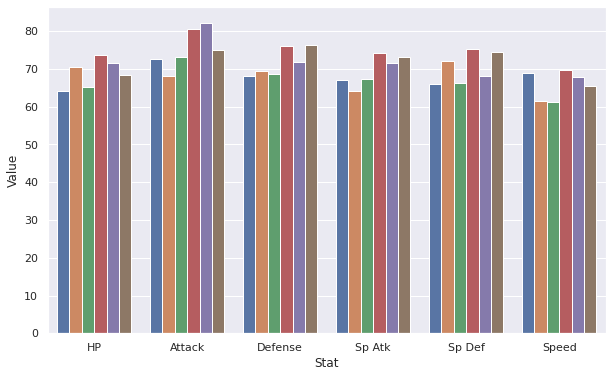

In [117]:
pkm_stats_gen_df = pkm_df[["Name","Generation"] + stats].drop_duplicates().groupby(["Generation"]).mean().reset_index()
plt.figure(figsize=(10,6))
pkm_stats_gen_df = pd.melt(pkm_stats_gen_df, id_vars=["Generation"], value_vars=stats, var_name="Stat", value_name="Value")
ax = sns.barplot(x="Stat", y="Value", hue="Generation", data=pkm_stats_gen_df)
ax.get_legend().remove()
plt.show()